In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import *
import ease_of_live_scripts as es
from scipy import optimize as fit
from pprint import *
import seaborn as sbs

In [ ]:
sbs.set()

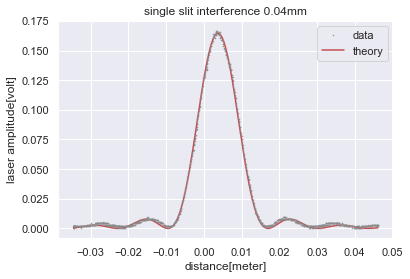

A:54.68130697369036
z:0.8396455694334474
d:4.002825785044088e-05
wl:6.334307744399825e-07
offset:0.003722580948660049
R^2:0.9985257914714079


In [2]:
pname=['A', 'z', 'd', 'wl', 'offset']
z=0.855
wl=(6.328*(10**(-7)))
d=4.0e-5
A=50
data=es.read('exp1125/original parameters/single slit/0.04','sweep2.txt')
s,f=[200,-200]
r,c=[320,1314/2]
r,c=[(f-s)/2,(s+f)/2]
r,c=[-0.5,-0.5]
xdata=z*np.sin(np.deg2rad((es.volt_to_angle(data['angle']))[int(c-r):int(c+r)])) #x data agusted for distortion
ydata=-data['power'][int(c-r):int(c+r)]
plt.plot(xdata,ydata,'.',markersize=1,zorder=2,color=sbs.color_palette()[7])
popt, pcov=fit.curve_fit(es.single_slit_model,xdata,ydata,[A, z, d, wl, es.offset],
                         bounds=((0      ,0     ,d-0.001*d,wl-wl*0.001,-np.inf),
                                 ( np.inf,np.inf,d+0.001*d,wl+wl*0.001,np.inf)))
plt.plot(xdata,es.single_slit_model(xdata,*popt),zorder=1,color=sbs.color_palette()[3])
plt.legend(['data','theory'])
plt.title('single slit interference 0.04mm')
plt.xlabel('distance[meter]')
plt.ylabel('laser amplitude[volt]')
plt.show()
for i in range(len(popt)): print(pname[i]+':'+str(popt[i]))
print('R^2:'+str(es.Rsquared(xdata,ydata,es.single_slit_model,popt)))

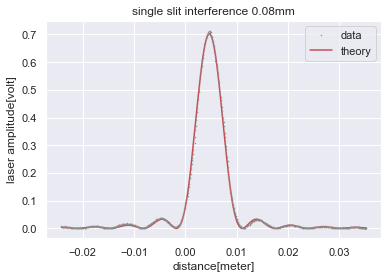

A:56.37180372558
z:0.8136285639577565
d:8.005952312781121e-05
wl:6.322718665696176e-07
offset:0.004685560690843836
R^2:0.9991010333093735
note: can be made to converge better on expected z value


In [3]:
pname=['A', 'z', 'd', 'wl', 'offset']
z=0.84
wl=(6.328*(10**(-7)))
d=8.0e-5
A=55
data=es.read('exp1125/original parameters/single slit/0.08','sweep1.txt')
s,f=[0,-80]
r,c=[320,1314/2]
r,c=[-0.5,-0.5]
r,c=[(f-s)/2,(s+f)/2]
xdata=z*np.sin(np.deg2rad((es.volt_to_angle(data['angle']))[int(c-r):int(c+r)])) #x data agusted for distortion
ydata=-data['power'][int(c-r):int(c+r)]
plt.plot(xdata,ydata,'.',markersize=1,zorder=2,color=sbs.color_palette()[7])
popt, pcov=fit.curve_fit(es.single_slit_model,xdata,ydata,[A, z, d, wl, es.offset],
                         bounds=((50     ,0     ,d-0.001*d,wl-wl*0.001,-np.inf),
                                 (60     ,np.inf,d+0.001*d,wl+wl*0.001,np.inf)))
plt.plot(xdata,es.single_slit_model(xdata,*popt),zorder=1,color=sbs.color_palette()[3])
plt.legend(['data','theory'])
plt.title('single slit interference 0.08mm')
plt.xlabel('distance[meter]')
plt.ylabel('laser amplitude[volt]')
plt.show()
for i in range(len(popt)): print(pname[i]+':'+str(popt[i]))
print('R^2:'+str(es.Rsquared(xdata,ydata,es.single_slit_model,popt)))
print('note: can be made to converge better on expected z value')

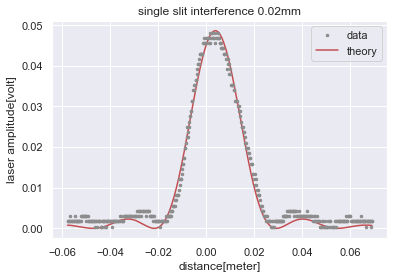

A:62.03551657443548
z:0.8045062899559225
d:1.998001819631764e-05
wl:6.330677643837219e-07
offset:0.0038472807120333513
R^2:0.9856006433935065
note: can be made to converge better on expected z value


In [4]:
pname=['A', 'z', 'd', 'wl', 'offset']
z=0.84
wl=(6.328*(10**(-7)))
d=2.0e-5
A=20
data=es.read('exp1125/original parameters/single slit/0.02','sweep2.txt')
s,f=[50,-80]
r,c=[320,1314/2]
r,c=[-0.5,-0.5]
r,c=[(f-s)/2,(s+f)/2]
xdata=z*np.sin(np.deg2rad((es.volt_to_angle(data['angle']))[int(c-r):int(c+r)])) #x data agusted for distortion
ydata=-data['power'][int(c-r):int(c+r)]
plt.plot(xdata,ydata,'.',markersize=5,zorder=2,color=sbs.color_palette()[7])
popt, pcov=fit.curve_fit(es.single_slit_model,xdata,ydata,[A, z, d, wl, es.offset],
                         bounds=((0     ,0     ,d-0.001*d,wl-wl*0.001,-np.inf),
                                 (np.inf,np.inf,d+0.001*d,wl+wl*0.001,np.inf)))
plt.plot(xdata,es.single_slit_model(xdata,*popt),zorder=1,color=sbs.color_palette()[3])
plt.legend(['data','theory'])
plt.title('single slit interference 0.02mm')
plt.xlabel('distance[meter]')
plt.ylabel('laser amplitude[volt]')
plt.show()
for i in range(len(popt)): print(pname[i]+':'+str(popt[i]))
print('R^2:'+str(es.Rsquared(xdata,ydata,es.single_slit_model,popt)))
print('note: can be made to converge better on expected z value')

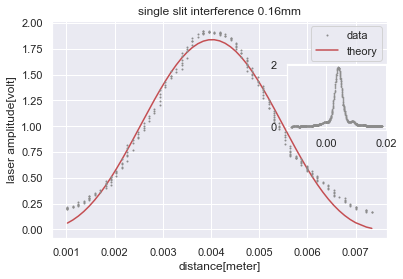

A:41.03445615724578
z:0.9045048033227776
d:0.0001601095932597945
wl:6.321730646763211e-07
offset:0.00401787560777939
R^2:0.984414811863369
note: can be made to converge better using a model that integrates over the iris width


In [44]:
pname=['A', 'z', 'd', 'wl', 'offset']
z=0.84
wl=(6.328*(10**(-7)))
d=16.0e-5
A=20
data=es.read('exp1125/original parameters/single slit/0.16','sweep1.txt')
r,c=[-0.5,-0.5]
s,f=[0,-1]
r,c=[(f-s)/2,(s+f)/2]
r,c=[120,2120]
xdata=z*np.sin(np.deg2rad((es.volt_to_angle(data['angle']))[int(c-r):int(c+r)])) #x data agusted for distortion
ydata=-data['power'][int(c-r):int(c+r)]
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(xdata,ydata,'.',markersize=2,zorder=2,color=sbs.color_palette()[7])
popt, pcov=fit.curve_fit(es.single_slit_model,xdata,ydata,[A, z, d, wl, es.offset],
                         bounds=((0     ,0     ,d-0.001*d,wl-wl*0.001,-np.inf),
                                 (np.inf,np.inf,d+0.001*d,wl+wl*0.001,np.inf)))
plt.plot(xdata,es.single_slit_model(xdata,*popt),zorder=1,color=sbs.color_palette()[3])
plt.legend(['data','theory'])
plt.title('single slit interference 0.16mm')
plt.xlabel('distance[meter]')
plt.ylabel('laser amplitude[volt]')
r,c=[520,2120]
rect = [0.7,0.5,0.3,0.3]
xdata=z*np.sin(np.deg2rad((es.volt_to_angle(data['angle']))[int(c-r):int(c+r)])) #x data agusted for distortion
ydata=-data['power'][int(c-r):int(c+r)]
ax1 = es.add_subplot_minimap(ax,rect)
ax1.plot(xdata,ydata,'.',markersize=1,color=sbs.color_palette()[7])
plt.show()
for i in range(len(popt)): print(pname[i]+':'+str(popt[i]))
print('R^2:'+str(es.Rsquared(xdata,ydata,es.single_slit_model,popt)))
print('note: can be made to converge better using a model that integrates over the iris width')

In [6]:
sbs.color_palette()

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]